In [5]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout , Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import cv2
import keras
import tensorflow as tf




import warnings
warnings.filterwarnings('ignore')

# Prepare and load dataset

In [6]:
x_train = []
y_train = []
for img in glob.glob("/content/drive/MyDrive/datasets/Training/glioma_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n,(130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append(0)

for img in glob.glob("/content/drive/MyDrive/datasets/Training/meningioma_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n,(130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append(1)


for img in glob.glob("/content/drive/MyDrive/datasets/Training/no_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append(2)

for img in glob.glob("/content/drive/MyDrive/datasets/Training/pituitary_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append(3)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

# Prepare and load data Test

In [8]:
x_test = []
y_test = []
for img in glob.glob("/content/drive/MyDrive/datasets/Testing/glioma_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append(0)

for img in glob.glob("/content/drive/MyDrive/datasets/Testing/meningioma_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append( 1)


for img in glob.glob("/content/drive/MyDrive/datasets/Testing/no_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append( 2)




for img in glob.glob("/content/drive/MyDrive/datasets/Testing/pituitary_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append( 3)

# Preprocess the data

In [10]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
from tensorflow.keras.applications.resnet import preprocess_input

train_ds = preprocess_input(x_train)
valid_ds = preprocess_input(x_valid) 
test_ds = preprocess_input(x_test)

# Create the base model from the pre-trained model ResNet152

In [12]:
from tensorflow.keras.applications.resnet import ResNet152

base_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (130,130,3))
for layer in base_model.layers:
  layer.trainable = False

234698864/234698864 [==============================] - 11s 0us/step


In [16]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(4 , activation = 'softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# Train the model

In [17]:
from tensorflow.keras.callbacks import EarlyStopping



history = model.fit(train_ds,y_train, validation_data= (valid_ds,y_valid),  
                              epochs=50,
                              verbose=1,callbacks=[tf.keras.callbacks.EarlyStopping
                               (monitor="val_loss",
                                patience=30,verbose=1,
                                restore_best_weights=True),
                               ])

Epoch 1/50
77/77 [==============================] - 35s 268ms/step - loss: 9.6060 - accuracy: 0.7372 - val_loss: 0.5106 - val_accuracy: 0.8376
Epoch 2/50
77/77 [==============================] - 15s 190ms/step - loss: 0.2851 - accuracy: 0.9008 - val_loss: 0.3569 - val_accuracy: 0.8863
Epoch 3/50
77/77 [==============================] - 14s 181ms/step - loss: 0.1934 - accuracy: 0.9319 - val_loss: 0.7379 - val_accuracy: 0.8144
Epoch 4/50
77/77 [==============================] - 15s 195ms/step - loss: 0.1666 - accuracy: 0.9438 - val_loss: 0.4738 - val_accuracy: 0.8863
Epoch 5/50
77/77 [==============================] - 14s 183ms/step - loss: 0.1313 - accuracy: 0.9541 - val_loss: 0.5442 - val_accuracy: 0.8956
Epoch 6/50
77/77 [==============================] - 14s 184ms/step - loss: 0.1565 - accuracy: 0.9578 - val_loss: 0.7251 - val_accuracy: 0.8654
Epoch 7/50
77/77 [==============================] - 14s 185ms/step - loss: 0.2386 - accuracy: 0.9422 - val_loss: 0.5761 - val_accuracy: 0.8677

# plot the loss and accuracy of the model

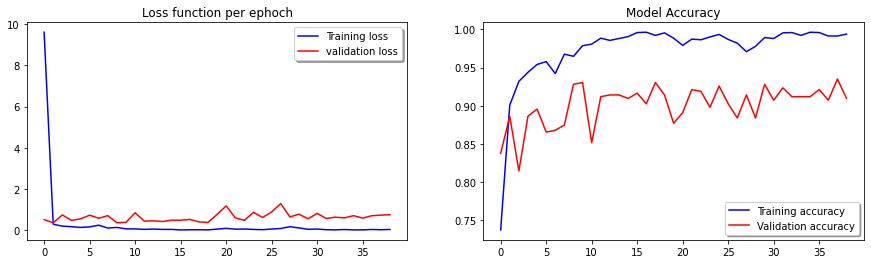

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (15, 4))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Loss function per ephoch')
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Model Accuracy')
legend = ax[1].legend(loc='best', shadow=True)

# train & test loss and accuracy

In [21]:
train_loss, train_acc= model.evaluate(train_ds,y_train)
print('train acc:', train_acc)
print('train loss:', train_loss)

77/77 [==============================] - 9s 120ms/step - loss: 0.0107 - accuracy: 0.9967
train acc: 0.9967199563980103
train loss: 0.010667418129742146


In [22]:
test_loss, test_acc = model.evaluate(test_ds,y_test)
print('test acc:', test_acc)
print('test loss:', test_loss)

13/13 [==============================] - 2s 118ms/step - loss: 2.4090 - accuracy: 0.7538
test acc: 0.7538071274757385
test loss: 2.408998727798462
